In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

![1.png](img/线性回归/1.png)

In [6]:
import numpy as np
X = 2*np.random.rand(100,1)    #返回100*1的矩阵，元素为[0-1)之间的随机值
y = 4+3*X+np.random.randn(100,1)

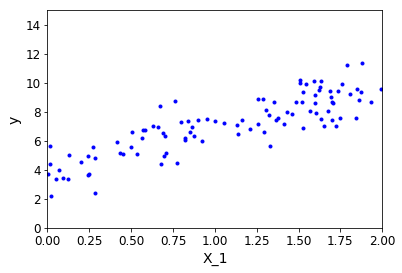

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,15])    #x轴y轴取值范围
plt.show()

In [10]:
'''求θ'''
X_b = np.c_[np.ones((100,1)),X]    #拼接X，加一列1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    #按公式直接求解
theta_best

array([[4.26713578],
       [2.64075047]])

In [21]:
'''预测'''
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
print(X_new)
print(theta_best)
print(y_predict)

[[0]
 [2]]
[[4.26713578]
 [2.64075047]]
[[4.26713578]
 [9.54863672]]


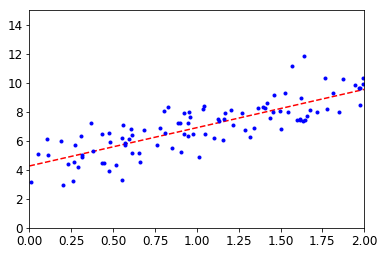

In [22]:
plt.plot(X_new,y_predict,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [24]:
'''线性回归'''
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)    #训练模型
print(lin_reg.coef_)     #权重参数
print(lin_reg.intercept_)    #偏置参数

[[2.64075047]]
[4.26713578]


### 梯度下降
![1.png](img/线性回归/2.png)
### 问题：步长太小
![1.png](img/线性回归/3.png)
### 问题：步长太大
![1.png](img/线性回归/4.png)
### 问题：
![1.png](img/线性回归/5.png)
### 标准化的作用
![1.png](img/线性回归/6.png)
### 批量梯度下井
![1.png](img/线性回归/7.png)
### 随机梯度下降
![1.png](img/线性回归/8.png)


In [26]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)   #完成一次梯度下降
    theta = theta - eta*gradients
print(theta)

[[4.26713578]
 [2.64075047]]


In [27]:
X_new_b.dot(theta)

array([[4.26713578],
       [9.54863672]])

### 不同学习率的影响

In [67]:
theta_path_bgd = []    #记录θ值
def plot_gradient_descent(theta,eta,theta_path = None):
    m=len(X_b)
    plt.plot(X,y,'b.')
    n_iterations=1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'b-')
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta={}'.format(eta))

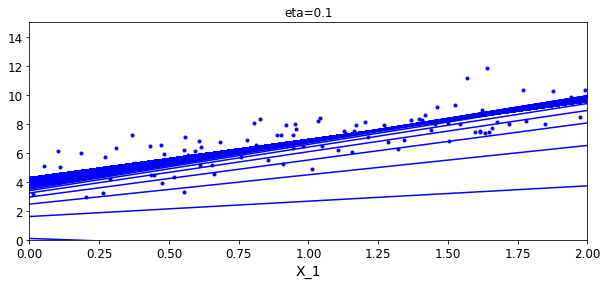

In [70]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()

### 随机梯度下降

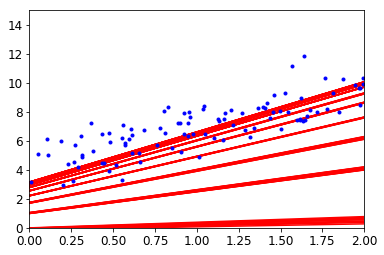

In [59]:
theta_path_sgd=[]
m=len(X_b)
n_epochs = 50
t0=5
t1=50

def learning_schedule(t):
    return t0/(t1+t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)    #只选一个数据
        eta=learning_schedule(n_epochs*m+i)
        theta = theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [56]:
from numpy import mat
#data5=mat(random.randint(2,8,size=(2,5))
a=[[1,2,3],[2,3,4]]
b=[[2,1],[4,2],[1,4]]
a=mat(a)
b=mat(b)
print(a.dot(b))

[[13 17]
 [20 24]]


### 小批量梯度下降
每次选一部分数据进行参数更新

In [62]:
theta_path_mgd=[]
n_epochs=50
minibatch=16
theta = np.random.randn(2,1)
t=0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]    #将样本数据打乱
    y_shuffled = y[shuffled_indices]    #将标签数据打乱
    for i in range(0,m,minibatch):
        t+=1
        xi = X_b_shuffled[i:i+minibatch]
        yi = y_shuffled[i:i+minibatch]
        gradients = 2/minibatch*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)    #更新学习率
        theta = theta-eta*gradients
        theta_path_mgd.append(theta)

In [63]:
theta

array([[4.27567204],
       [2.63328089]])

### 三种策略的对比情况

In [65]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
theta_path_sgd

array([[[-0.11458217],
        [ 0.2423535 ]],

       [[-0.10058526],
        [ 0.26521431]],

       [[-0.08437443],
        [ 0.27859693]],

       ...,

       [[ 3.86944261],
        [ 2.95633421]],

       [[ 3.86834715],
        [ 2.95601619]],

       [[ 3.86694438],
        [ 2.95538831]]])

TypeError: list indices must be integers or slices, not tuple

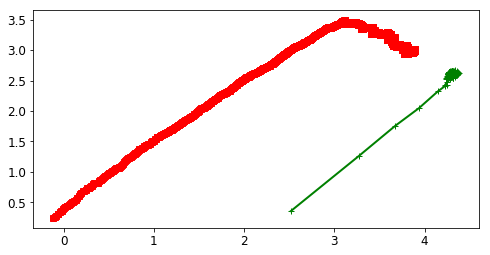

In [71]:
plt.figure(figsize=(8,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'g-+',linewidth=2,label='MINIGD')
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'b-o',linewidth=3,label='BGD')
plt.legend(loc='upper left')
plt.show()

### 多项式回归

In [73]:
m = 100
X = 6*np.random.rand(m,1) - 3    #产生[0-3)的数据
y = 0.5*X**2+X+np.random.randn(m,1)    #定义方程

(100, 1)

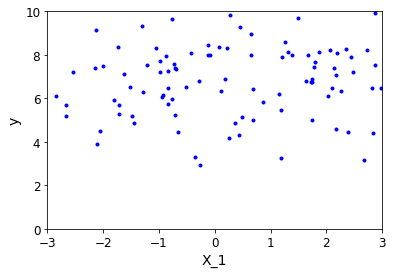

In [75]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,0,10])
plt.show()